1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

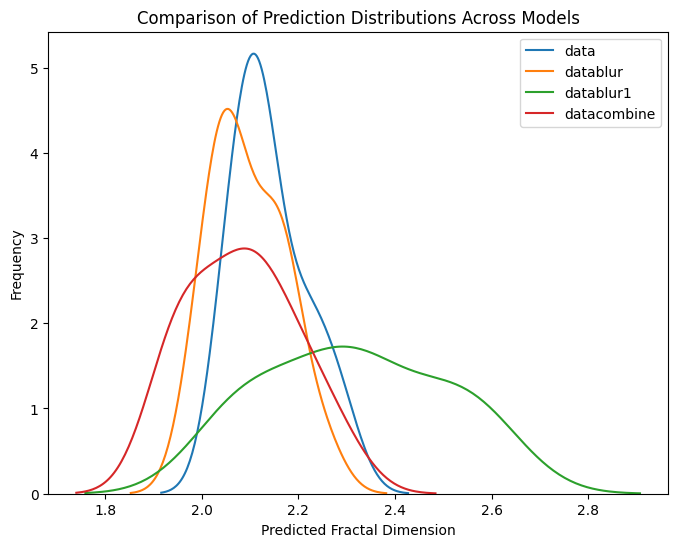


Predictions per model per image:

particle_1.bmp:
  data: 2.0676
  datablur: 2.0383
  datablur1: 2.0736
  datacombine: 1.9452

particle_2.bmp:
  data: 2.0528
  datablur: 1.9975
  datablur1: 2.0930
  datacombine: 1.9321

particle_3.bmp:
  data: 2.2304
  datablur: 2.1537
  datablur1: 2.5377
  datacombine: 2.0907

particle_4.bmp:
  data: 2.2611
  datablur: 2.1920
  datablur1: 2.4526
  datacombine: 2.1960

particle_5.bmp:
  data: 2.1361
  datablur: 2.0344
  datablur1: 2.3473
  datacombine: 2.1229

particle_6.bmp:
  data: 2.1875
  datablur: 2.1541
  datablur1: 2.5929
  datacombine: 2.2923

particle_7.bmp:
  data: 2.2090
  datablur: 2.1612
  datablur1: 2.3150
  datacombine: 2.1338

particle_8.bmp:
  data: 2.0457
  datablur: 1.9840
  datablur1: 2.0733
  datacombine: 1.9337

particle_9.bmp:
  data: 2.1222
  datablur: 2.0397
  datablur1: 2.2919
  datacombine: 1.9683

particle_10.bmp:
  data: 2.1028
  datablur: 2.0882
  datablur1: 2.2798
  datacombine: 2.0293

particle_11.bmp:
  data: 2.1240
  

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import seaborn as sns
# Define constants
IMG_SIZE = (128, 128)
IMAGE_DIR = "/Users/braydennoh/Research/flocCNN/realflocs"
MODEL_PATHS = {
    "data": "/Users/braydennoh/Research/flocCNN/data.h5",
    "datablur": "/Users/braydennoh/Research/flocCNN/datablur.h5",
    "datablur1": "/Users/braydennoh/Research/flocCNN/datablur1.h5",
    "datacombine": "/Users/braydennoh/Research/flocCNN/datacombine.h5"
}

# Load models
models = {name: load_model(path) for name, path in MODEL_PATHS.items()}

# Function to preprocess a single .bmp image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE, color_mode="grayscale")
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1)  # Ensure correct shape
    return img_array

# Process all BMP images from particle_1.bmp to particle_16.bmp
predictions = {name: [] for name in MODEL_PATHS}  # Store predictions for each model
image_filenames = []  # Store image filenames for reference

for i in range(1, 17):
    image_path = os.path.join(IMAGE_DIR, f"particle_{i}.bmp")
    if os.path.exists(image_path):  # Check if file exists
        image_filenames.append(f"particle_{i}.bmp")
        processed_img = preprocess_image(image_path)
        for model_name, model in models.items():
            predicted_d2 = model.predict(processed_img)[0, 0]
            predictions[model_name].append(predicted_d2)
    else:
        print(f"Warning: {image_path} not found.")

# Plot distributions of predictions
plt.figure(figsize=(8, 6))
for model_name, preds in predictions.items():
    sns.kdeplot(preds, label=model_name)

plt.xlabel("Predicted Fractal Dimension")
plt.ylabel("Frequency")
plt.title("Comparison of Prediction Distributions Across Models")
plt.legend()
plt.show()

# Print out predictions for each particle and each model
print("\nPredictions per model per image:")
for i, filename in enumerate(image_filenames):
    print(f"\n{filename}:")
    for model_name in MODEL_PATHS:
        print(f"  {model_name}: {predictions[model_name][i]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

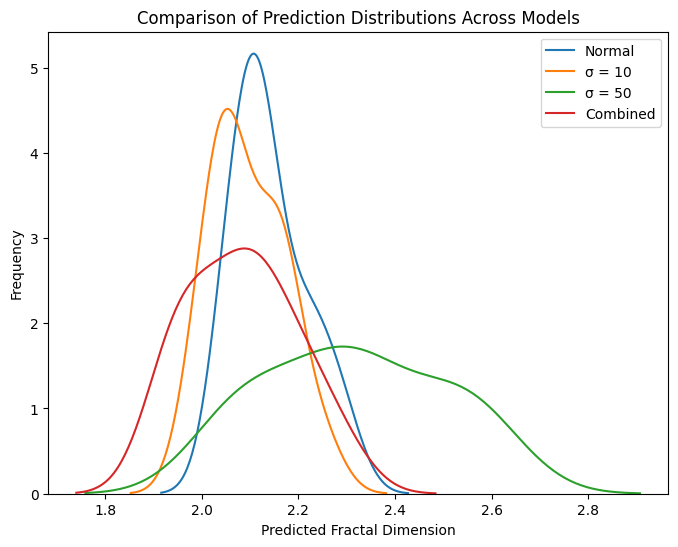

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import seaborn as sns

# Define constants
IMG_SIZE = (128, 128)
IMAGE_DIR = "/Users/braydennoh/Research/flocCNN/realflocs"
MODEL_PATHS = {
    "Normal": "/Users/braydennoh/Research/flocCNN/data.h5",
    "σ = 10": "/Users/braydennoh/Research/flocCNN/datablur.h5",
    "σ = 50": "/Users/braydennoh/Research/flocCNN/datablur1.h5",
    "Combined": "/Users/braydennoh/Research/flocCNN/datacombine.h5"
}

# Load models
models = {name: load_model(path) for name, path in MODEL_PATHS.items()}

# Function to preprocess a single .bmp image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE, color_mode="grayscale")
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1)  # Ensure correct shape
    return img_array

# Process all BMP images from particle_1.bmp to particle_16.bmp
predictions = {name: [] for name in MODEL_PATHS}  # Store predictions for each model
image_filenames = []  # Store image filenames for reference

for i in range(1, 17):
    image_path = os.path.join(IMAGE_DIR, f"particle_{i}.bmp")
    if os.path.exists(image_path):  # Check if file exists
        image_filenames.append(f"particle_{i}.bmp")
        processed_img = preprocess_image(image_path)
        for model_name, model in models.items():
            predicted_d2 = model.predict(processed_img)[0, 0]
            predictions[model_name].append(predicted_d2)
    else:
        print(f"Warning: {image_path} not found.")

# Plot distributions of predictions
plt.figure(figsize=(8, 6))
for model_name, preds in predictions.items():
    sns.kdeplot(preds, label=model_name)

plt.xlabel("Predicted Fractal Dimension")
plt.ylabel("Frequency")
plt.title("Comparison of Prediction Distributions Across Models")
plt.legend()
plt.show()

In [5]:
import os
import shutil

# Define paths
SOURCE_DIR = "/Users/braydennoh/Research/flocCNN/realflocs"
DEST_DIR = "/Users/braydennoh/Research/flocCNN"

# Ensure destination directory exists
os.makedirs(DEST_DIR, exist_ok=True)

# Get sorted list of subdirectories (1, 2, 3, 4)
subfolders = sorted([d for d in os.listdir(SOURCE_DIR) if os.path.isdir(os.path.join(SOURCE_DIR, d))])

# Track unique particle numbering
particle_index = 1

# Process each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(SOURCE_DIR, subfolder)
    
    # Get all BMP files in the subfolder
    bmp_files = sorted([f for f in os.listdir(subfolder_path) if f.endswith(".bmp")])
    
    for bmp_file in bmp_files:
        old_path = os.path.join(subfolder_path, bmp_file)
        new_filename = f"particle_{particle_index}.bmp"
        new_path = os.path.join(DEST_DIR, new_filename)

        # Move and rename the file
        shutil.move(old_path, new_path)
        print(f"Moved: {old_path} -> {new_path}")

        particle_index += 1  # Increment unique index


Moved: /Users/braydennoh/Research/flocCNN/realflocs/1/particle_1.bmp -> /Users/braydennoh/Research/flocCNN/particle_1.bmp
Moved: /Users/braydennoh/Research/flocCNN/realflocs/1/particle_10.bmp -> /Users/braydennoh/Research/flocCNN/particle_2.bmp
Moved: /Users/braydennoh/Research/flocCNN/realflocs/1/particle_11.bmp -> /Users/braydennoh/Research/flocCNN/particle_3.bmp
Moved: /Users/braydennoh/Research/flocCNN/realflocs/1/particle_12.bmp -> /Users/braydennoh/Research/flocCNN/particle_4.bmp
Moved: /Users/braydennoh/Research/flocCNN/realflocs/1/particle_13.bmp -> /Users/braydennoh/Research/flocCNN/particle_5.bmp
Moved: /Users/braydennoh/Research/flocCNN/realflocs/1/particle_14.bmp -> /Users/braydennoh/Research/flocCNN/particle_6.bmp
Moved: /Users/braydennoh/Research/flocCNN/realflocs/1/particle_15.bmp -> /Users/braydennoh/Research/flocCNN/particle_7.bmp
Moved: /Users/braydennoh/Research/flocCNN/realflocs/1/particle_16.bmp -> /Users/braydennoh/Research/flocCNN/particle_8.bmp
Moved: /Users/bra

In [24]:
import cv2
import numpy as np
from PIL import Image
from scipy.interpolate import interp1d
from sympy import symbols, solve

def capacity_dimension_3d(filename, ell):
    """
    Capacity Dimension 3D Function in Python
    Args:
        filename (str): Path to the grayscale image file
        ell (int): Desired resolution (must be larger than the original image size)

    Returns:
        d0_3D (float): Estimated 3D capacity dimension
    """
    # Load the grayscale image
    grayscale_image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Convert to binary using Otsu's method
    _, binary_image = cv2.threshold(grayscale_image, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Check if ell is greater than the original image size
    if ell <= max(binary_image.shape):
        raise ValueError(f"Error: Desired resolution ell ({ell}) must be greater than the original image size ({max(binary_image.shape)}).")

    # Resize binary image to the desired resolution
    resized_image = cv2.resize(binary_image, (ell, ell), interpolation=cv2.INTER_NEAREST)

    # Dimensionless area of the aggregate (N_A)
    N_A = np.sum(resized_image == 1)

    # Dimensionless perimeter of the aggregate (N_P)
    perimeter = np.pad(resized_image, pad_width=1, mode='constant', constant_values=0)
    N_P = np.sum(perimeter[1:, :-1] != perimeter[:-1, :-1]) + np.sum(perimeter[:-1, 1:] != perimeter[:-1, :-1])

    # Outermost perimeter-based fractal dimension (dP_0)
    dP_0 = 2 * np.log10(N_P) / np.log10(N_A)

    # Perimeter-based fractal dimension at I=1
    Z = 2 * np.log10(4 * ell - 4) / np.log10(ell ** 2)

    # Alpha with \tilde{alpha}=4
    alpha = (4 - 2) * dP_0 / (Z - 2) + 2 * (Z - 4) / (Z - 2)

    # Analytical dP_I spectrum (dP_I = AI^2 + BI + C)
    A = -1 * alpha * (Z - dP_0) / (2 - alpha)
    B = Z - dP_0 - A
    C = dP_0

    # Check if the spectrum exceeds the global maximum = 2
    I_max = -1 * B / (2 * A)
    dP_I_max = A * I_max**2 + B * I_max + C

    if dP_I_max > 2:  # If dP_I_max exceeds 2
        tmpA = Z - dP_0
        tmpB = 2 * (dP_0 - 2)
        tmpC = 2 - dP_0

        discriminant = tmpB**2 - 4 * tmpA * tmpC
        if discriminant >= 0:
            tmpI = [
                (-tmpB + np.sqrt(discriminant)) / (2 * tmpA),
                (-tmpB - np.sqrt(discriminant)) / (2 * tmpA),
            ]
            tmpI_max = [i for i in tmpI if 0 < i < 1]
            if len(tmpI_max) > 0:
                tmpI_max = min(tmpI_max)
                A = (dP_0 - Z) / (2 * tmpI_max - 1)
                B = Z - dP_0 - A

    # Interpolation to find beta1, beta2, beta3
    ell_given = np.array([64, 128, 256, 512, 1024, 2048, 4096, 8192])
    beta1_given = np.array([3.1239, 4.1186, 5.0458, 6.1108, 7.5930, 10.4402, 13.7207, 16.4458])
    beta2_given = np.array([-9.7720, -12.4070, -14.8611, -17.6664, -21.6212, -29.3393, -38.0654, -44.7104])
    beta3_given = np.array([8.3318, 10.0342, 11.5941, 13.3657, 15.9176, 21.0255, 26.6887, 30.6337])

    beta1 = interp1d(ell_given, beta1_given, kind='linear')(ell)
    beta2 = interp1d(ell_given, beta2_given, kind='linear')(ell)
    beta3 = interp1d(ell_given, beta3_given, kind='linear')(ell)

    # Determine optimum perimeter-based fractal dimension (dP_I_opt)
    tmpdP_I_opt = symbols('tmpdP_I_opt')
    tmp_eq = A * (beta1 * tmpdP_I_opt**2 + beta2 * tmpdP_I_opt + beta3)**2 + \
             B * (beta1 * tmpdP_I_opt**2 + beta2 * tmpdP_I_opt + beta3) + \
             C - tmpdP_I_opt
    tmpdP_I_opt_solutions = solve(tmp_eq, tmpdP_I_opt)
    tmpdP_I_opt_real = [sol.evalf() for sol in tmpdP_I_opt_solutions if sol.is_real]

    tmpdP_I_opt_real = [dP for dP in tmpdP_I_opt_real if Z <= dP <= 2]
    if len(tmpdP_I_opt_real) == 0:  # No real solution
        dP_I_opt = A * I_max**2 + B * I_max + C
    else:
        dP_I_opt = max(tmpdP_I_opt_real)

    # 3D Capacity Dimension (d0_3D)
    k = Z * (Z - 1) + 1
    a = 9 * (Z - ((2 * k**2 - 9 * Z) / (k**2 - 9)))
    b = (2 * k**2 - 9 * Z) / (k**2 - 9)

    d0_3D = np.sqrt(float(a) / (float(dP_I_opt) - float(b)))  # Convert sympy objects to float
    return d0_3D

In [25]:
import os

# Define the correct directory
IMAGE_DIR = "/Users/braydennoh/Research/flocCNN/realflocs"
ELL = 1024  # Resolution parameter

# List to store computed d0_3D values
d0_3D_values = []

# Get all BMP files in IMAGE_DIR
bmp_files = sorted([f for f in os.listdir(IMAGE_DIR) if f.endswith(".bmp")])

if not bmp_files:
    print("No BMP files found in:", IMAGE_DIR)

# Process each BMP file
for bmp_file in bmp_files:
    file_path = os.path.join(IMAGE_DIR, bmp_file)

    # Compute 3D capacity dimension
    try:
        d0_3D = capacity_dimension_3d(file_path, ELL)
        d0_3D_values.append(d0_3D)  # Store value in the list
        print(f"{file_path}: d0_3D = {d0_3D:.4f}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Now d0_3D_values contains all the fractal dimension values
print("\nComputed d0_3D values:", d0_3D_values)


/Users/braydennoh/Research/flocCNN/realflocs/particle_1.bmp: d0_3D = 2.1287
/Users/braydennoh/Research/flocCNN/realflocs/particle_10.bmp: d0_3D = 2.3011
/Users/braydennoh/Research/flocCNN/realflocs/particle_11.bmp: d0_3D = 2.5201
/Users/braydennoh/Research/flocCNN/realflocs/particle_12.bmp: d0_3D = 2.0941
/Users/braydennoh/Research/flocCNN/realflocs/particle_13.bmp: d0_3D = 2.6323
/Users/braydennoh/Research/flocCNN/realflocs/particle_14.bmp: d0_3D = 2.7012
/Users/braydennoh/Research/flocCNN/realflocs/particle_15.bmp: d0_3D = 1.9499
/Users/braydennoh/Research/flocCNN/realflocs/particle_16.bmp: d0_3D = 2.6167
/Users/braydennoh/Research/flocCNN/realflocs/particle_17.bmp: d0_3D = 2.3363
/Users/braydennoh/Research/flocCNN/realflocs/particle_18.bmp: d0_3D = 2.3768
/Users/braydennoh/Research/flocCNN/realflocs/particle_19.bmp: d0_3D = 2.3660
/Users/braydennoh/Research/flocCNN/realflocs/particle_2.bmp: d0_3D = 2.0974
/Users/braydennoh/Research/flocCNN/realflocs/particle_20.bmp: d0_3D = 2.8255
/

In [40]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1000

/var/folders/pp/sd0jpn250jv__fhf9lvrfnsm0000gn/T/ipykernel_57015/2657175480.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(datasets, vert=False, patch_artist=True, labels=labels)


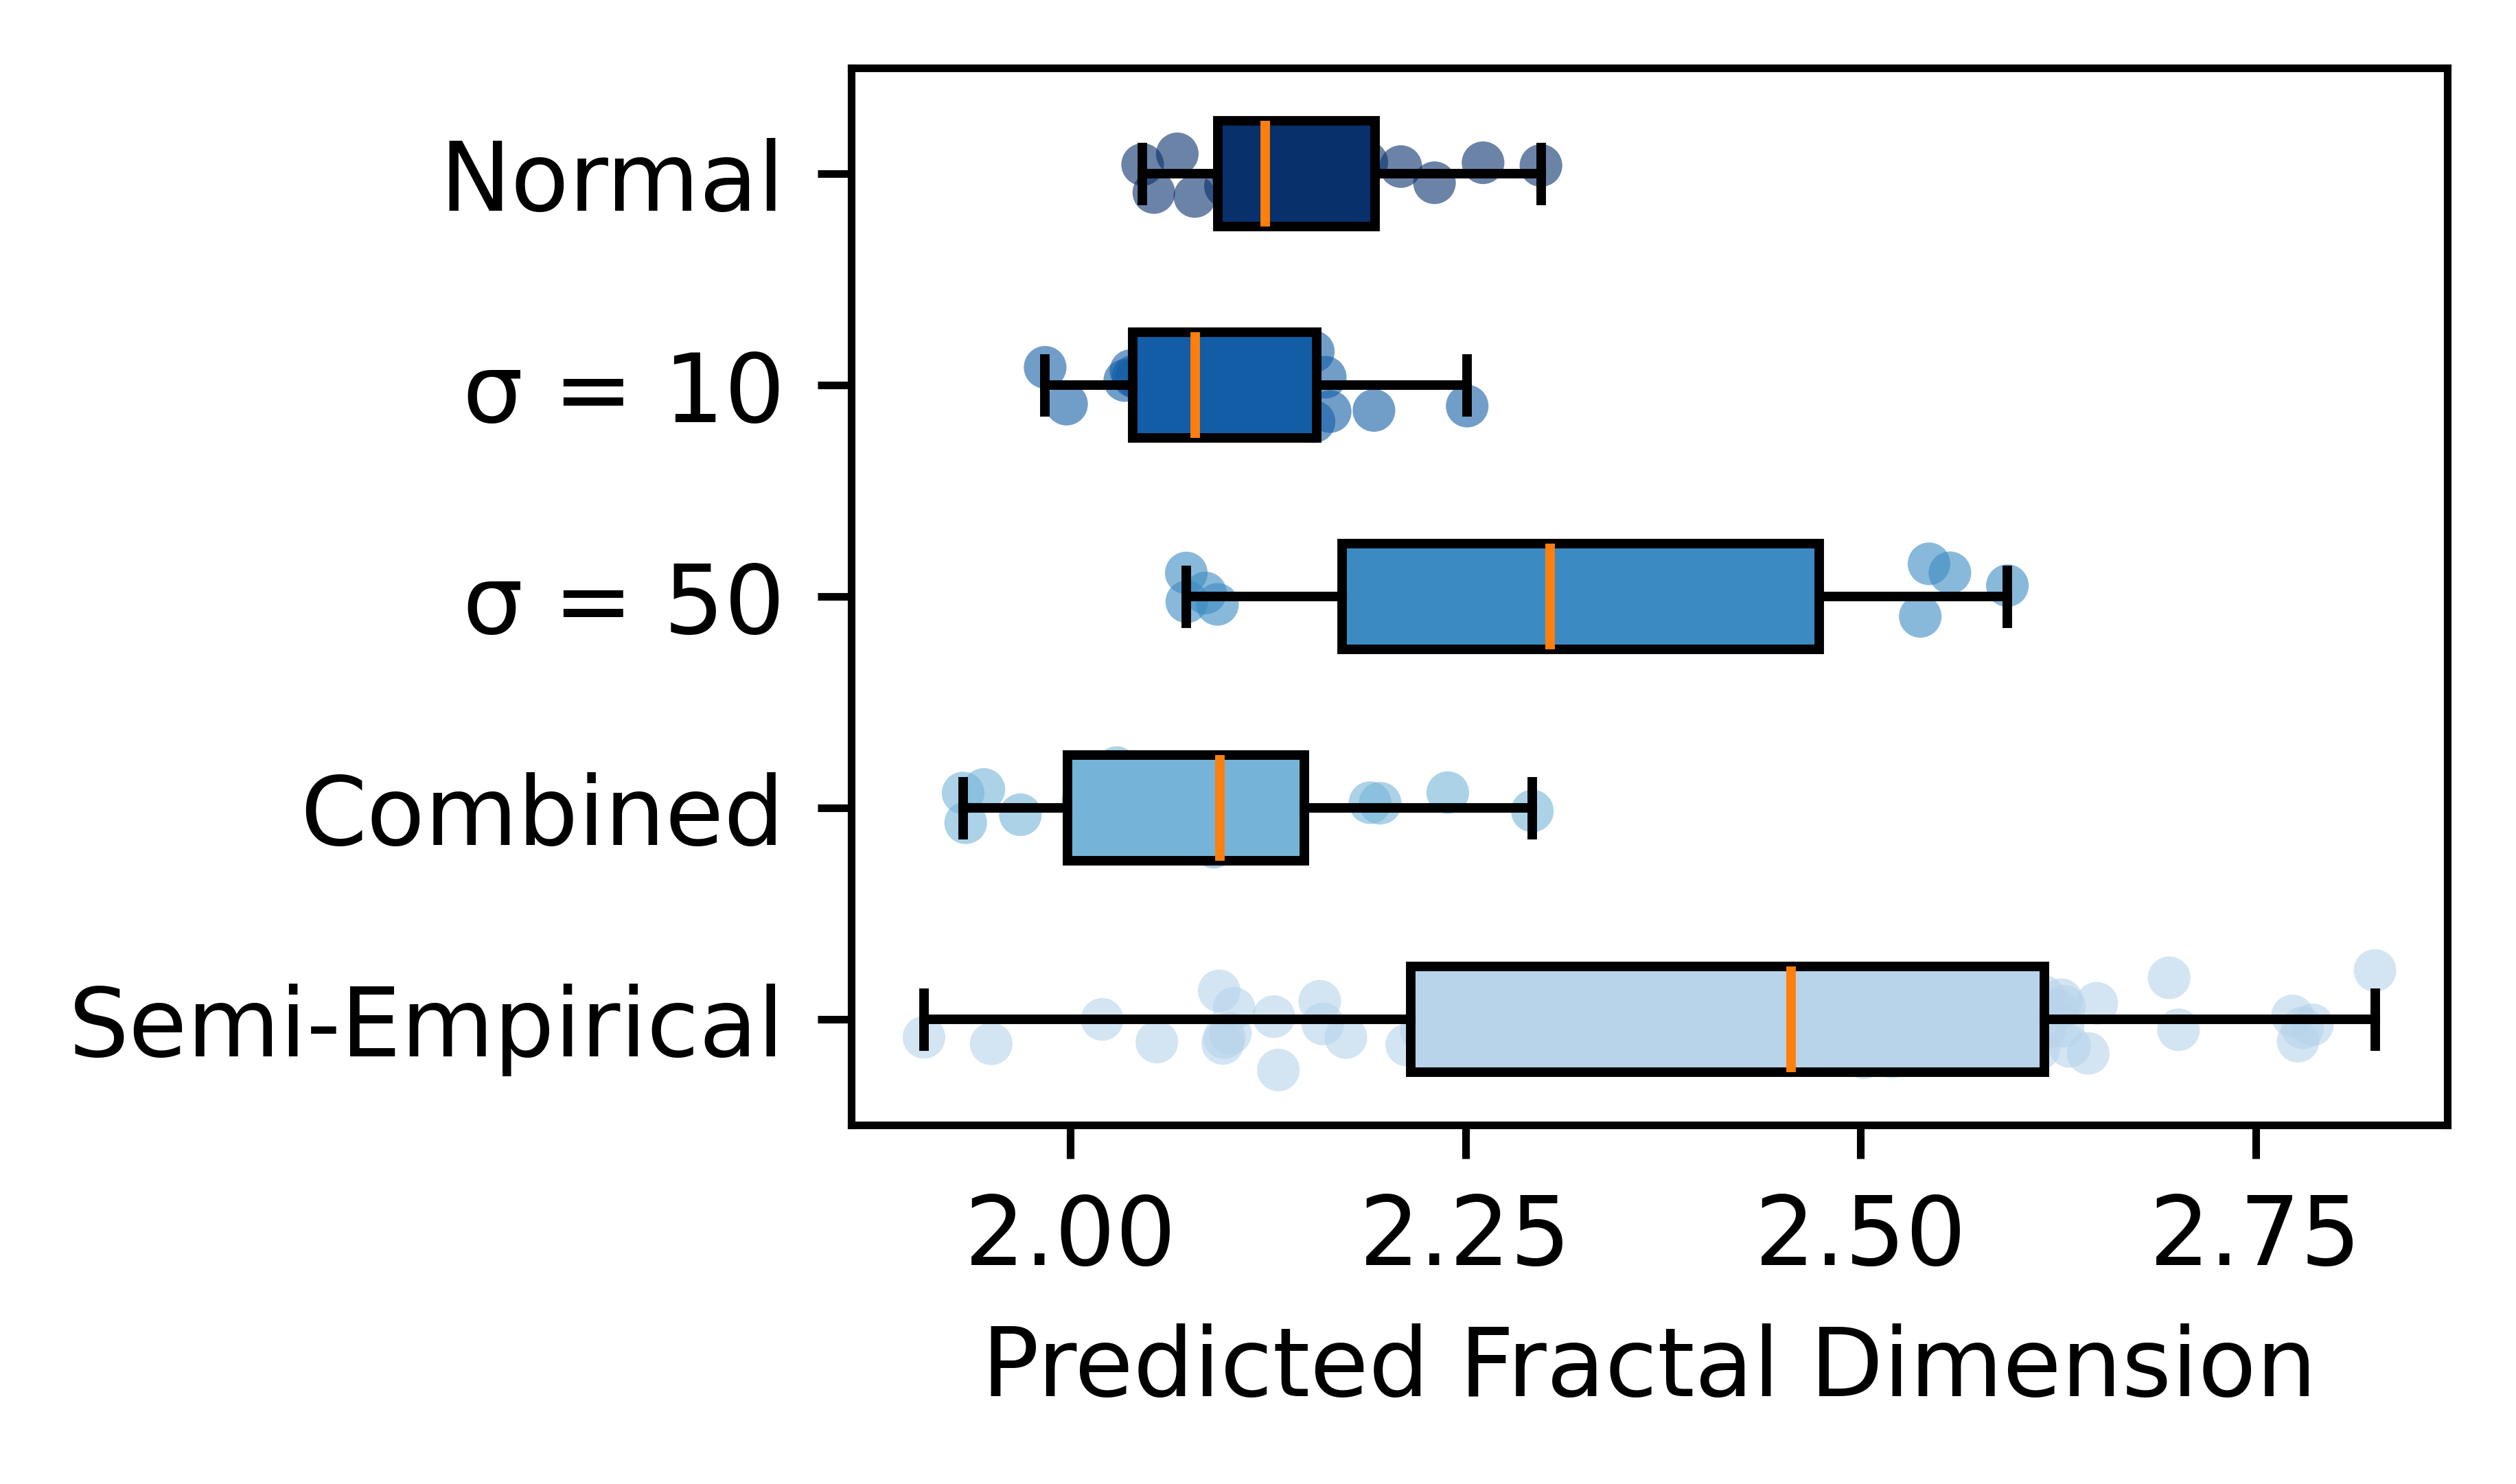

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming d0_3D_values and predictions dictionary are provided
d0_3D_values = np.array(d0_3D_values)

# Extracting data from predictions dictionary
datasets = [np.array(preds) for preds in predictions.values()]
labels = list(predictions.keys())

# Adding the semi-empirical dataset
datasets.append(d0_3D_values)
labels.append("Semi-Empirical")

# Reverse the order of datasets and labels
datasets = datasets[::-1]
labels = labels[::-1]

# Create figure
fig, ax = plt.subplots(figsize=(3,2))

# Create a box plot
box = ax.boxplot(datasets, vert=False, patch_artist=True, labels=labels)

# Apply blues colormap
colors = plt.cm.Blues(np.linspace(0.3, 1, len(datasets)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add scatter plot
for i, data in enumerate(datasets, start=1):
    x_jitter = np.random.normal(0, 0.1, len(data))  # Add jitter for visibility
    ax.scatter(data, np.full_like(data, i) + x_jitter, alpha=0.6, color=colors[i-1],s = 20,edgecolor='none')

# Labels and title
ax.set_xlabel("Predicted Fractal Dimension")

# Show plot
plt.show()



In [55]:
datasets = [np.array(preds) for preds in predictions.values()]
labels = list(predictions.keys())

# Adding the semi-empirical dataset
datasets.append(d0_3D_values)
labels.append("Semi-Empirical")

# Reverse the order of datasets and labels
datasets = datasets[::-1]
labels = labels[::-1]

# Calculate min, max, and mean for each dataset
statistics = {}
for dataset, label in zip(datasets, labels):
    statistics[label] = {
        'min': np.min(dataset),
        'max': np.max(dataset),
        'median': np.median(dataset)
    }

statistics


{'Semi-Empirical': {'min': np.float64(1.9072868455728318),
  'max': np.float64(2.825464901496202),
  'median': np.float64(2.455959450209841)},
 'Combined': {'min': np.float32(1.9320614),
  'max': np.float32(2.2922873),
  'median': np.float32(2.0944905)},
 'σ = 50': {'min': np.float32(2.073293),
  'max': np.float32(2.5928788),
  'median': np.float32(2.3034263)},
 'σ = 10': {'min': np.float32(1.9839721),
  'max': np.float32(2.251037),
  'median': np.float32(2.0791278)},
 'Normal': {'min': np.float32(2.0456717),
  'max': np.float32(2.2977114),
  'median': np.float32(2.1231246)}}